In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2022-03-10 14:19:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-10 14:19:17 (55.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys


## Download a text dataset


- We'll use Real or Not? dataset from kaggle, theses tweets are about disasters. Real tweets are about disasters, Not Real not.

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

unzip_data("nlp_getting_started.zip")

--2022-03-10 14:19:25--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2022-03-10 14:19:25 (52.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
import pandas as pd
 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(test_df), len(train_df)

(3263, 7613)

In [ ]:
import numpy as np

index = np.random.randint(len(train_df))

print('text: ', train_df.iloc[index]['text'], 'target: ',train_df.iloc[index]['target'])

text:  Read an eyewitness account from #Hiroshima from this day in 1945 http://t.co/njAffyjaRz http://t.co/1xHSuEwQn4 #LIFE target:  1


In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(train_df['text'].to_numpy(),
                                                                train_df['target'].to_numpy(),
                                                                test_size=0.1,
                                                                random_state=42)

In [ ]:
len(train_data), len(val_data)

(6851, 762)

In [ ]:
train_data[:2], train_labels[:2]

(array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
        'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3'],
       dtype=object), array([0, 1]))

In [ ]:
(sum([len(i.split()) for i in train_data])/len(train_data))


14.87447088016348

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_data)

In [ ]:
r = np.random.randint(len(train_data))
print('Original: ', train_data[r], '\nVectorized: ', text_vectorizer([train_data[r]]))

Original:  Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/KuKmAL605a 
Vectorized:  tf.Tensor([[304 718 260  26  20 173 275 176 390   7   2 137   6 168  65]], shape=(1, 15), dtype=int64)


In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='embedding1')

embedding

In [ ]:
sample_embed = embedding(text_vectorizer([np.random.choice(train_data)]))
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00141127,  0.00013101, -0.02221487, ..., -0.02841103,
          0.01705525, -0.03261976],
        [-0.01241505, -0.01245154, -0.01579802, ..., -0.00842866,
         -0.00462294,  0.04274369],
        [ 0.00952078, -0.02246168,  0.0286714 , ...,  0.00039744,
          0.00421672,  0.00773579],
        ...,
        [-0.04053413,  0.03020902,  0.0494238 , ..., -0.02977476,
         -0.02285862, -0.03041654],
        [-0.02994402,  0.03094781,  0.04056821, ...,  0.04669083,
          0.02630286,  0.02757785],
        [ 0.01357174,  0.01971508, -0.04795435, ...,  0.01143168,
          0.03334633, -0.00582184]]], dtype=float32)>

## Modelos

### Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

model_0.fit(train_data, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline = model_0.score(val_data, val_labels)
round(baseline*100, 2)

77.82

In [ ]:
baseline_preds = model_0.predict(val_data)
baseline_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results 

{'accuracy': 0.7782152230971129,
 'f1': 0.7703527809038113,
 'precision': 0.792992256322435,
 'recall': 0.7782152230971129}

### Model 1

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1')

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tra

In [ ]:
history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220310-142657
Epoch 1/5
215/215 [==============================] - 8s 30ms/step - loss: 0.6104 - accuracy: 0.6999 - val_loss: 0.5412 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.4385 - accuracy: 0.8209 - val_loss: 0.4825 - val_accuracy: 0.7953
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3441 - accuracy: 0.8624 - val_loss: 0.4745 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 6s 30ms/step - loss: 0.2814 - accuracy: 0.8939 - val_loss: 0.4858 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.2349 - accuracy: 0.9142 - val_loss: 0.5031 - val_accuracy: 0.7887


In [ ]:
model_1_pred_probs = model_1.predict(val_data)
model_1_pred_probs[:10]

array([[0.02595517],
       [0.13534194],
       [0.32576758],
       [0.02232641],
       [0.5826735 ],
       [0.09599498],
       [0.02135023],
       [0.25456572],
       [0.09823814],
       [0.89233804]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)

model_1_results

{'accuracy': 0.7887139107611548,
 'f1': 0.7855470855324442,
 'precision': 0.7916531471434233,
 'recall': 0.7887139107611548}

In [ ]:
baseline_results

{'accuracy': 0.7782152230971129,
 'f1': 0.7703527809038113,
 'precision': 0.792992256322435,
 'recall': 0.7782152230971129}

In [ ]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([ True, False,  True,  True])

In [ ]:
def compare_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}')

compare_results(baseline_results, model_1_results)

Baseline accuracy: 0.78, New accuracy: 0.79, Difference: 0.01
Baseline precision: 0.79, New precision: 0.79, Difference: -0.00
Baseline recall: 0.78, New recall: 0.79, Difference: 0.01
Baseline f1: 0.77, New f1: 0.79, Difference: 0.02


In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
embed_weights = model_1.get_layer("embedding1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
import io

out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model 2 - LSTM

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2_lstm')

model_2.summary()

(None, 15, 128)
(None, 64)
Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        train_labels,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                               "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220310-145113
Epoch 1/5
215/215 [==============================] - 17s 58ms/step - loss: 0.5133 - accuracy: 0.7457 - val_loss: 0.4634 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 11s 53ms/step - loss: 0.3158 - accuracy: 0.8697 - val_loss: 0.5127 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 12s 56ms/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.5207 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 11s 52ms/step - loss: 0.1494 - accuracy: 0.9469 - val_loss: 0.6415 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 11s 52ms/step - loss: 0.1078 - accuracy: 0.9603 - val_loss: 0.9990 - val_accuracy: 0.7493


In [ ]:
model_2_pred_probs = model_2.predict(val_data)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10], model_2_pred_probs[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>,
 array([[8.89509916e-04],
        [2.43474275e-01],
        [1.27834082e-03],
        [1.22323632e-03],
        [9.99049783e-01],
        [1.13345981e-02],
        [4.25696373e-04],
        [1.06678605e-02],
        [3.79672647e-03],
        [9.95400310e-01]], dtype=float32))

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 0.7493438320209974,
 'f1': 0.7476826901434999,
 'precision': 0.7485543214441167,
 'recall': 0.7493438320209974}

In [ ]:
compare_results(baseline_results, model_2_results)

Baseline accuracy: 0.78, New accuracy: 0.75, Difference: -0.03
Baseline precision: 0.79, New precision: 0.75, Difference: -0.04
Baseline recall: 0.78, New recall: 0.75, Difference: -0.03
Baseline f1: 0.77, New f1: 0.75, Difference: -0.02


### Model 3 - GRU

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(val_data,
                        val_labels,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, 'GRU')])

Saving TensorBoard log files to: model_logs/GRU/20220310-150243
Epoch 1/5
24/24 [==============================] - 8s 101ms/step - loss: 0.6874 - accuracy: 0.5735 - val_loss: 0.6695 - val_accuracy: 0.5722
Epoch 2/5
24/24 [==============================] - 1s 57ms/step - loss: 0.6596 - accuracy: 0.6627 - val_loss: 0.6099 - val_accuracy: 0.7664
Epoch 3/5
24/24 [==============================] - 2s 67ms/step - loss: 0.4641 - accuracy: 0.8294 - val_loss: 0.1948 - val_accuracy: 0.9331
Epoch 4/5
24/24 [==============================] - 2s 63ms/step - loss: 0.1574 - accuracy: 0.9462 - val_loss: 0.0842 - val_accuracy: 0.9816
Epoch 5/5
24/24 [==============================] - 1s 55ms/step - loss: 0.0856 - accuracy: 0.9738 - val_loss: 0.0705 - val_accuracy: 0.9816


In [ ]:
model_3_pred_probs = model_3.predict(val_data)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

model_3_pred_probs[:10], model_3_preds[:10]

(array([[8.5378838e-01],
        [6.5171719e-04],
        [9.8517752e-01],
        [2.3993850e-04],
        [2.3985803e-03],
        [9.0277195e-04],
        [9.9185258e-01],
        [2.5617397e-01],
        [8.7994624e-05],
        [9.9301887e-01]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1.], dtype=float32)>)

In [ ]:
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 0.9816272965879265,
 'f1': 0.9815803514462907,
 'precision': 0.9822118826055835,
 'recall': 0.9816272965879265}

In [ ]:
compare_results(baseline_results, model_3_results)

Baseline accuracy: 0.78, New accuracy: 0.98, Difference: 0.20
Baseline precision: 0.79, New precision: 0.98, Difference: 0.19
Baseline recall: 0.78, New recall: 0.98, Difference: 0.20
Baseline f1: 0.77, New f1: 0.98, Difference: 0.21


### Model 4 - Bidirectional RNN model

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_Bidirectional')

model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        train_labels,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20220310-151000
Epoch 1/5
215/215 [==============================] - 25s 85ms/step - loss: 0.5087 - accuracy: 0.7476 - val_loss: 0.4609 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 15s 71ms/step - loss: 0.3123 - accuracy: 0.8734 - val_loss: 0.4913 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 16s 73ms/step - loss: 0.2069 - accuracy: 0.9219 - val_loss: 0.5476 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 16s 73ms/step - loss: 0.1374 - accuracy: 0.9534 - val_loss: 0.7794 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 15s 70ms/step - loss: 0.0949 - accuracy: 0.9664 - val_loss: 0.8710 - val_accuracy: 0.7703


In [ ]:
model_4_pred_probs = model_4.predict(val_data)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred_probs[:10], model_4_preds[:10]

(array([[2.98723578e-03],
        [5.15570343e-02],
        [2.93156505e-03],
        [3.18035483e-03],
        [7.94913054e-01],
        [1.07218325e-02],
        [5.93632460e-04],
        [2.56424844e-02],
        [1.08699799e-02],
        [9.96686101e-01]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>)

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.7703412073490814,
 'f1': 0.7681521486280054,
 'precision': 0.7705642182525246,
 'recall': 0.7703412073490814}

In [ ]:
compare_results(baseline_results, model_4_results)

Baseline accuracy: 0.78, New accuracy: 0.77, Difference: -0.01
Baseline precision: 0.79, New precision: 0.77, Difference: -0.02
Baseline recall: 0.78, New recall: 0.77, Difference: -0.01
Baseline f1: 0.77, New f1: 0.77, Difference: -0.00


### Model 5 - Conv net

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_conv1d')

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        train_labels,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220310-151939
Epoch 1/5
215/215 [==============================] - 8s 33ms/step - loss: 0.5648 - accuracy: 0.7127 - val_loss: 0.4832 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.3377 - accuracy: 0.8608 - val_loss: 0.4957 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 7s 35ms/step - loss: 0.2072 - accuracy: 0.9238 - val_loss: 0.5810 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1319 - accuracy: 0.9553 - val_loss: 0.6830 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0940 - accuracy: 0.9676 - val_loss: 0.7453 - val_accuracy: 0.7664


In [ ]:
model_5_pred_probs = model_5.predict(val_data)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

model_5_pred_probs[:10], model_5_preds[:10]

(array([[0.00294369],
        [0.1619207 ],
        [0.02702928],
        [0.00460279],
        [0.03934947],
        [0.03104374],
        [0.00287899],
        [0.02108777],
        [0.00827295],
        [0.99816185]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>)

In [ ]:
model_5_results = calculate_results(val_labels, model_5_preds)

model_5_results

{'accuracy': 0.7664041994750657,
 'f1': 0.7636489669560537,
 'precision': 0.7672043367996721,
 'recall': 0.7664041994750657}

In [ ]:
compare_results(baseline_results, model_5_results)

Baseline accuracy: 0.78, New accuracy: 0.77, Difference: -0.01
Baseline precision: 0.79, New precision: 0.77, Difference: -0.03
Baseline recall: 0.78, New recall: 0.77, Difference: -0.01
Baseline f1: 0.77, New f1: 0.76, Difference: -0.01


## Using transfer learning, pretrained embeddings

### Model 6 - Tensorflow hub pretrained sentence encoder

In [ ]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[282,   3, 206,   4,  13, 674,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729 -0.00430605 -0.05894248 -0.06101276 -0.02220006
 -0.01575761 -0.00474414 -0.03515062 -0.04440378 -0.04174353  0.04943501
 -0.02740932 -0.04133103  0.01634343 -0.03713683  0.07395209 -0.00659237
 -0.06943312 -0.00361752  0.08656701  0.07717377 -0.06633057  0.02086625
  0.06676424  0.0098211   0.01410715  0.07672231  0.05026634  0.0296993
 -0.01391873  0.06082513  0.08967175 -0.0

In [ ]:
embed_samples.shape

TensorShape([2, 512])

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                         input_shape=[], 
                                         dtype=tf.string, 
                                         trainable=False, 
                                         name="USE")

In [ ]:
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation='relu'),
                               layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data,
                        train_labels,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                               "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220310-154234
Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.5059 - accuracy: 0.7859 - val_loss: 0.4267 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4176 - accuracy: 0.8161 - val_loss: 0.4083 - val_accuracy: 0.8163
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4039 - accuracy: 0.8238 - val_loss: 0.4017 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3946 - accuracy: 0.8291 - val_loss: 0.3999 - val_accuracy: 0.8228
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3882 - accuracy: 0.8295 - val_loss: 0.3980 - val_accuracy: 0.8163


In [ ]:
model_6_pred_probs = model_6.predict(val_data)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

model_6_pred_probs[:10], model_6_preds[:10]

(array([[0.08217874],
        [0.08725804],
        [0.40880683],
        [0.1577496 ],
        [0.28201458],
        [0.09270442],
        [0.11662424],
        [0.08069623],
        [0.35367596],
        [0.77516234]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>)

In [ ]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 0.8162729658792651,
 'f1': 0.8144644671093966,
 'precision': 0.817804024496938,
 'recall': 0.8162729658792651}

In [ ]:
compare_results(baseline_results, model_6_results)

Baseline accuracy: 0.78, New accuracy: 0.82, Difference: 0.04
Baseline precision: 0.79, New precision: 0.82, Difference: 0.02
Baseline recall: 0.78, New recall: 0.82, Difference: 0.04
Baseline f1: 0.77, New f1: 0.81, Difference: 0.04


### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [ ]:
train_sentences_90_percent, train_data_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_data),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

print(f"Total training examples: {len(train_data)}")
print(f"Length of 10% training examples: {len(train_data_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    391
1    295
dtype: int64

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_data, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20220310-154342
Epoch 1/5
22/22 [==============================] - 8s 98ms/step - loss: 0.6731 - accuracy: 0.6778 - val_loss: 0.6508 - val_accuracy: 0.7388
Epoch 2/5
22/22 [==============================] - 1s 53ms/step - loss: 0.6162 - accuracy: 0.7799 - val_loss: 0.5973 - val_accuracy: 0.7612
Epoch 3/5
22/22 [==============================] - 1s 50ms/step - loss: 0.5496 - accuracy: 0.8105 - val_loss: 0.5408 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 1s 38ms/step - loss: 0.4890 - accuracy: 0.8149 - val_loss: 0.5016 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 51ms/step - loss: 0.4470 - accuracy: 0.8294 - val_loss: 0.4777 - val_accuracy: 0.7782


In [ ]:
model_7_pred_probs = model_7.predict(val_data)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

model_7_pred_probs[:10], model_7_preds[:10]

(array([[0.27621794],
        [0.20991087],
        [0.6122556 ],
        [0.13695693],
        [0.54002064],
        [0.16288513],
        [0.30958506],
        [0.27312487],
        [0.12440154],
        [0.65233696]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>)

In [ ]:
model_7_results = calculate_results(val_labels, model_7_preds)

model_7_results

{'accuracy': 0.7782152230971129,
 'f1': 0.7774076525045006,
 'precision': 0.7775829593271211,
 'recall': 0.7782152230971129}

In [ ]:
compare_results(baseline_results, model_7_results)

Baseline accuracy: 0.78, New accuracy: 0.78, Difference: 0.00
Baseline precision: 0.79, New precision: 0.78, Difference: -0.02
Baseline recall: 0.78, New recall: 0.78, Difference: 0.00
Baseline f1: 0.77, New f1: 0.78, Difference: 0.01


## Comparing perfomance

In [ ]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.778215,0.792992,0.778215,0.770353
simple_dense,0.788714,0.791653,0.788714,0.785547
lstm,0.749344,0.748554,0.749344,0.747683
gru,0.981627,0.982212,0.981627,0.981580
bidirectional,0.770341,0.770564,0.770341,0.768152
conv1d,0.766404,0.767204,0.766404,0.763649
tf_hub_sentence_encoder,0.816273,0.817804,0.816273,0.814464
tf_hub_10_percent_data,0.778215,0.777583,0.778215,0.777408


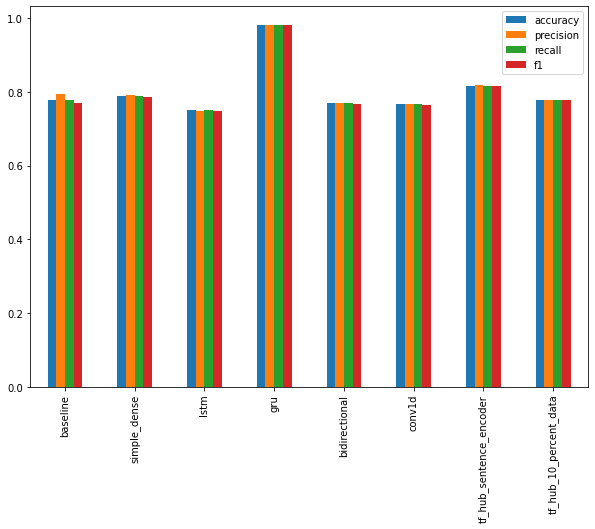

In [ ]:
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

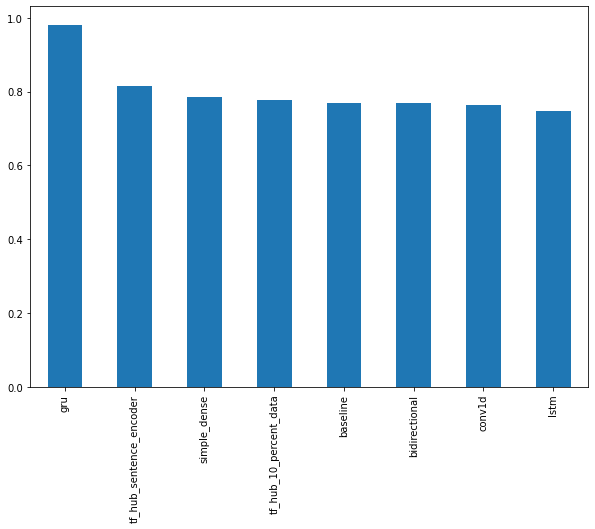

In [ ]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Model ensembling/stacking

In [ ]:
baseline_pred_probs = np.max(model_0.predict_proba(val_data), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_3_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) 
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.], dtype=float32)>

In [ ]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 0.9671916010498688,
 'f1': 0.9671863848421397,
 'precision': 0.9671845460227675,
 'recall': 0.9671916010498688}

In [ ]:
all_model_results.loc['ensemble_results'] = ensemble_results

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.778215,0.792992,0.778215,0.770353
simple_dense,0.788714,0.791653,0.788714,0.785547
lstm,0.749344,0.748554,0.749344,0.747683
gru,0.981627,0.982212,0.981627,0.981580
bidirectional,0.770341,0.770564,0.770341,0.768152
conv1d,0.766404,0.767204,0.766404,0.763649
tf_hub_sentence_encoder,0.816273,0.817804,0.816273,0.814464
tf_hub_10_percent_data,0.778215,0.777583,0.778215,0.777408
ensemble_results,0.967192,0.967185,0.967192,0.967186


## Finding the most wrong examples

In [ ]:
val_df = pd.DataFrame({"text": val_data,
                       "target": val_labels,
                       "pred": model_3_preds,
                       "pred_prob": tf.squeeze(model_3_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,So you have a new weapon that can cause un-ima...,1,1.0,0.853788
1,The f$&amp;@ing things I do for #GISHWHES Just...,0,0.0,0.000652
2,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,1.0,0.985178
3,Aftershock back to school kick off was great. ...,0,0.0,0.000240
4,in response to trauma Children of Addicts deve...,0,0.0,0.002399


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=True)
most_wrong[:10]

,text,target,pred,pred_prob
149,@KatRamsland Yes I'm a bleeding heart liberal.,1,0.0,0.000546
575,Armageddon https://t.co/uCSUDk3q1d,1,0.0,0.001524
584,Reddit Will Now Quarantine Offensive Content h...,1,0.0,0.002191
292,@Kirafrog @mount_wario Did you get wrecked again?,1,0.0,0.003129
543,#NoChillLukeHammings\nIM SCREAMING,1,0.0,0.005182
613,My hand is burning,1,0.0,0.054043
243,Û÷Hijacker copsÛª back in the dock - http://...,1,0.0,0.070156
199,#Metepec #Mexico - ?NIGHT DISASTER?...E(Oficia...,1,0.0,0.078236
516,Hellfire is surrounded by desires so be carefu...,1,0.0,0.185084
749,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,0.0,0.192786


In [ ]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.000545889139175415
Text:
@KatRamsland Yes I'm a bleeding heart liberal.

----

Target: 1, Pred: 0, Prob: 0.0015236139297485352
Text:
Armageddon https://t.co/uCSUDk3q1d

----

Target: 1, Pred: 0, Prob: 0.0021912455558776855
Text:
Reddit Will Now Quarantine Offensive Content http://t.co/WosYPVQUFI http://t.co/XW8SDS1Tjp

----

Target: 1, Pred: 0, Prob: 0.0031289756298065186
Text:
@Kirafrog @mount_wario Did you get wrecked again?

----

Target: 1, Pred: 0, Prob: 0.005182027816772461
Text:
#NoChillLukeHammings
IM SCREAMING

----

Target: 1, Pred: 0, Prob: 0.05404278635978699
Text:
My hand is burning

----

Target: 1, Pred: 0, Prob: 0.07015559077262878
Text:
Û÷Hijacker copsÛª back in the dock - http://t.co/9I5cczD5S0 http://t.co/WEaTrRihE1

----

Target: 1, Pred: 0, Prob: 0.0782364010810852
Text:
#Metepec #Mexico - ?NIGHT DISASTER?...E(Oficial) @ #NitClub #mÌ¼sica #mÌ¼sica http://t.co/WTfJF9jjzs

----

Target: 1, Pred: 0, Prob: 0.18508407473564148
Text:
Hellfir

In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.005182027816772461
Text:
#NoChillLukeHammings
IM SCREAMING

----

Target: 1, Pred: 0, Prob: 0.05404278635978699
Text:
My hand is burning

----

Target: 1, Pred: 0, Prob: 0.07015559077262878
Text:
Û÷Hijacker copsÛª back in the dock - http://t.co/9I5cczD5S0 http://t.co/WEaTrRihE1

----

Target: 1, Pred: 0, Prob: 0.0782364010810852
Text:
#Metepec #Mexico - ?NIGHT DISASTER?...E(Oficial) @ #NitClub #mÌ¼sica #mÌ¼sica http://t.co/WTfJF9jjzs

----

Target: 1, Pred: 0, Prob: 0.18508407473564148
Text:
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife

----

Target: 1, Pred: 0, Prob: 0.19278648495674133
Text:
@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C

----

Target: 1, Pred: 0, Prob: 0.1972620189189911
Text:
@camilacabello97 Internally and externally screaming

----

Target: 1, Pred: 0, Prob: 0.2308618724346161
Text:
To All The Meat-Loving Feminists Of The World Riot Grill Has Arrived http://t.co/TiOst8o

## Prediction test dataset

In [ ]:
import random

test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.2653019428253174
Text:
Trump &amp; Bill Clinton collide in best conspiracy story ever http://t.co/ABkhBhNLOz via @motherjones TRUMP DEMOCRATIC PLANT?  lmao #lastword

----

Pred: 0, Prob: 0.031281977891922
Text:
Do you feel engulfed with anxiety? Take the quiz: http://t.co/Um6weIUjyW http://t.co/Fm92uk6Yp2

----

Pred: 0, Prob: 0.08830279111862183
Text:
When something bad happens; you have 3 choices: You can either let it define you destroy you or let it strengthen you.

----

Pred: 0, Prob: 0.049857109785079956
Text:
He was being super bitchy yesterday (cause he felt like pop) and when he's bitchy him and Perla don't play and then Perla is devastated

----

Pred: 1, Prob: 0.8682423233985901
Text:
119 Sri Lanka's 'Emergency' Line. 
Busy for the past 30 mins. 
Suppose I need to plan my emergencies better. #SL #RT

----

Pred: 0, Prob: 0.17418882250785828
Text:
@oilersjaysfan how's the rain have you drowned yet?

----

Pred: 0, Prob: 0.07641801238059998
Text:
Waiting for

## speed/score tradeoff

In [ ]:
import time
def pred_timer(model, samples):

  start_time = time.perf_counter() 
  model.predict(samples)
  end_time = time.perf_counter() 
  total_time = end_time-start_time 
  time_per_pred = total_time/len(samples) 
  return total_time, time_per_pred

In [ ]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_data)
model_6_total_pred_time, model_6_time_per_pred

(0.4380462979997901, 0.0005748639081362075)

In [ ]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_data)
baseline_total_pred_time, baseline_time_per_pred

(0.080015829000331, 0.00010500764960673359)

In [ ]:
model_3_total_pred_time, model_3_time_per_pred = pred_timer(model_3, val_data)
model_3_total_pred_time, model_3_time_per_pred

(0.8621654529997613, 0.0011314507257214716)

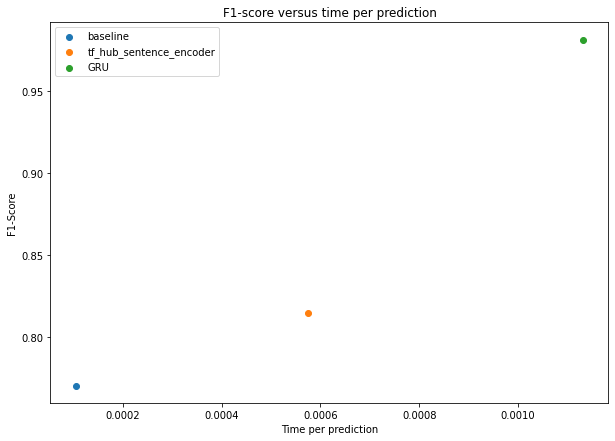

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.scatter(model_3_time_per_pred, model_3_results["f1"], label="GRU")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");